In [1]:
import numpy as np
from numpy.linalg import svd
np.random.seed(121)
a= np.random.randn(4,4)
print(a)

[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]


In [5]:
#svd 행렬 분해
U, Sigma , Vt = svd(a)
print(U.shape,Sigma.shape,Vt.shape)
svd(a)

(4, 4) (4,) (4, 4)


(array([[-0.07913928, -0.31822729,  0.86653217,  0.37628494],
        [ 0.38294523,  0.78655287,  0.12002097,  0.46934262],
        [ 0.65640669,  0.02243181,  0.35668848, -0.66437971],
        [ 0.64515128, -0.52873697, -0.32785711,  0.44353889]]),
 array([3.4229581 , 2.02287339, 0.46263157, 0.07935069]),
 array([[ 0.04100747,  0.22367823,  0.78643002, -0.57429458],
        [-0.20019867,  0.56209596,  0.37041464,  0.71187191],
        [-0.77847455,  0.3945136 , -0.33259252, -0.3573774 ],
        [-0.5934781 , -0.69164673,  0.36565426,  0.18895901]]))

In [14]:
# 다시 원행렬로 
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U,Sigma_mat),Vt) # 원본과 같다.

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])

In [15]:
a[2] = a[0]+a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [18]:
#svd 재 행렬 분해
U, Sigma , Vt = svd(a)
print(U.shape,Sigma.shape,Vt.shape)
Sigma

(4, 4) (4,) (4, 4)


array([2.66335286e+00, 8.07035060e-01, 1.30310447e-16, 3.87711837e-17])

In [19]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [20]:
import numpy as np
from scipy.sparse.linalg import svds #희소행렬에만 지원
from scipy.linalg import svd 
np.random.seed(121)
matrix = np. random.random((6,6))
print(matrix)

[[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]


C:\Users\Administrator\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Administrator\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [21]:
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)



분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


In [26]:
# Truncated SVD로 Sigma 행렬의 특이값을 5개로 하여 Truncated SVD 수행. 
num_components = 5
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)


Truncated SVD 분해 행렬 차원: (6, 5) (5,) (5, 6)

Truncated SVD Sigma값 행렬: [0.35834824 0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.11368271 0.19721195 0.23106956 0.15961551 0.82758207 0.41695496]
 [0.55500167 0.75007112 0.24913473 0.96608621 0.95355502 0.48681791]
 [0.01789183 0.85994318 0.40526464 0.62115143 0.29581906 0.92803075]
 [0.40782587 0.55456069 0.24397702 0.23294659 0.035838   0.58947208]
 [0.82711496 0.78558742 0.94865955 0.7293489  0.67564311 0.73695659]
 [0.5136488  0.45748403 0.64231412 0.82744766 0.14323933 0.0258799 ]]


사이킷런 trauncatedsvd 클래스는 PCA와 비슷하다.

C:\Users\Administrator\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Administrator\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Text(0, 0.5, 'TruncatedSVD Component 2')

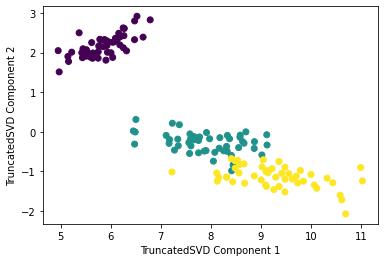

In [27]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

In [29]:
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

Text(0.5, 1.0, 'pca')

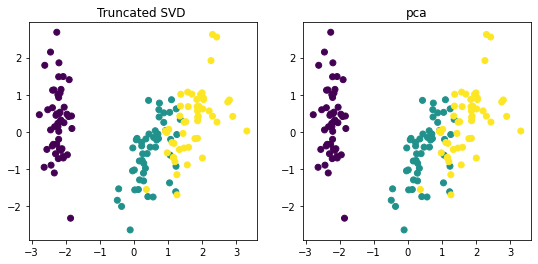

In [33]:
fig, (ax1,ax2)= plt.subplots(figsize=(9,4),ncols=2)
ax1.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
ax2.scatter(x=iris_pca[:,0],y=iris_pca[:,1],c=iris.target)
ax1.set_title('Truncated SVD ')
ax2.set_title('pca')

In [31]:
iris_tsvd.shape

(150, 2)

## NMF

In [ ]:
# 모든 값이 모듀 양수일 경우 좀더 간단하게 
# 2 행렬로 분해될 수 잇는 기법

In [34]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Text(0, 0.5, 'NMF Component 2')

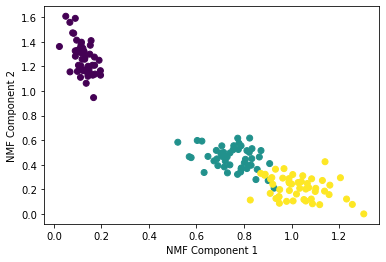

In [35]:
iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)

nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
